In [1]:
import os

assert os.environ["CONDA_DEFAULT_ENV"]=="viz"

In [2]:
import sys
sys.path.insert(0, '..')
from toi_viz import get_tois

tois = get_tois(clobber=False, remove_known_planets=False)
tois.shape, tois["TFOPWG Disposition"].unique()

Loaded: ../data/TOIs.csv
TOIs with TFPWG disposition==`False Positive` & `False Alarm` are removed.
TOIs with `SB2` in Comments are removed.



((5622, 62), array(['KP', 'CP', 'PC', 'APC', nan], dtype=object))

In [3]:
drop_cols = ['Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
            'SG3', 'SG4', 'SG5', 
             # 'ACWG ESM', 'ACWG TSM', 
             'Time Series Observations',
            'Spectroscopy Observations', 'Imaging Observations', 
             # 'TESS Disposition', 'TFOPWG Disposition', 
             'Date TOI Updated (UTC)', 'Date Modified', 
            'Planet Name', 'Pipeline Signal ID', 'Source', 'Detection', 'Epoch (BJD)',
            'Sectors', 'Date TOI Alerted (UTC)', 
             # 'Comments',
            ]
tois = tois.drop(drop_cols, axis=1).filter(regex='^((?!err).)*$')
tois.columns.tolist()

['TIC ID',
 'TOI',
 'ESM',
 'TSM',
 'Predicted Mass (M_Earth)',
 'TESS Disposition',
 'TFOPWG Disposition',
 'TESS Mag',
 'RA',
 'Dec',
 'PM RA (mas/yr)',
 'PM Dec (mas/yr)',
 'Period (days)',
 'Duration (hours)',
 'Depth (mmag)',
 'Depth (ppm)',
 'Planet Radius (R_Earth)',
 'Planet Insolation (Earth Flux)',
 'Planet Equil Temp (K)',
 'Planet SNR',
 'Stellar Distance (pc)',
 'Stellar Eff Temp (K)',
 'Stellar log(g) (cm/s^2)',
 'Stellar Radius (R_Sun)',
 'Stellar Metallicity',
 'Stellar Mass (M_Sun)',
 'Comments']

In [4]:
import sys
sys.path.insert(1, "/home/jp/github/research/project/wakai/code")
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Hunt2023", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/673/A114
{'J/A+A/673/A114/clusters': 'Main catalogue (Table 3)',
 'J/A+A/673/A114/clustrej': 'Objects rejected from main catalogue',
 'J/A+A/673/A114/crossma': 'All (non-)xmatched clusters (Table B.1)',
 'J/A+A/673/A114/members': 'Member stars of clusters (corrected version)',
 'J/A+A/673/A114/membrej': 'Member stars of rejected clusters'}


In [5]:
import astropy.units as u
from astropy.coordinates import Distance

df = tabs[0].to_pandas()
df = df[df.Plx>0]
df["distance"] = Distance(parallax=df["Plx"].values * u.mas).pc
df.head()

,Name,ID,Type,N,RA_ICRS,DE_ICRS,r50,pmRA,pmDE,Plx,dist50,X,Y,Z,RV,isMerged,isGMMMemb,_RA.icrs,_DE.icrs,distance
0,1636-283,0,o,38,249.855743,-28.399194,0.016319,-1.454902,-6.525783,0.131381,6063.456695,-2248.916442,-834.329905,1276.428553,16.786382,0,0,249.855750,-28.399165,7611.424017
1,ADS_16795,1,o,41,352.592165,58.553413,2.653159,18.656604,2.846613,4.759611,206.457885,-8200.949467,190.523268,11.391597,-13.357744,0,0,352.592006,58.553401,210.101225
2,AH03_J0748+26.9,2,o,68,117.155887,-26.972679,0.034106,-2.465490,3.185035,0.209358,3979.064883,-9916.032137,-3551.448985,-18.194602,79.360523,0,0,117.155899,-26.972694,4776.504489
3,ASCC_5,3,o,25,14.469082,55.829174,0.054491,-2.406631,-1.918818,0.538197,1740.983207,-9084.803224,1435.133769,-189.847236,NaN,0,0,14.469101,55.829182,1858.054934
4,ASCC_6,4,o,209,26.842159,57.738607,0.143602,-0.834145,0.149175,0.629667,1501.885864,-9092.167569,1141.104359,-89.948355,-28.837841,0,0,26.842166,57.738606,1588.140201


In [6]:
df.shape

(7105, 20)

In [7]:
df_mem = tabs[1].to_pandas()
df_mem = df_mem[df_mem.Plx>0]
df_mem["distance"] = Distance(parallax=df_mem["Plx"].values * u.mas).pc
df_mem.tail()

,Name,ID,GaiaDR3,inrt,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag,RV,_RA.icrs,_DE.icrs,distance
1291924,vdBergh_92,7163,3045840104515988992,1,1.000000,106.116546,-11.474387,-4.446,1.700,0.8419,18.107680,19.282660,16.973217,NaN,106.116566,-11.474394,1187.789551
1291925,vdBergh_92,7163,3045840074455065088,1,0.838193,106.136236,-11.471452,-4.228,1.542,0.9300,16.596190,17.493513,15.584210,NaN,106.136255,-11.471459,1075.268799
1291926,vdBergh_92,7163,3045840074453671680,1,0.639341,106.135606,-11.468653,-4.165,1.551,0.7865,16.886219,17.950207,15.875672,NaN,106.135625,-11.468660,1271.455811
1291927,vdBergh_92,7163,3045840654267074048,1,0.738133,106.159649,-11.436082,-4.158,1.572,0.9719,16.914060,17.826698,15.848995,NaN,106.159667,-11.436089,1028.912476
1291928,vdBergh_92,7163,3046211537585833984,1,0.811015,106.285883,-11.502450,-4.120,1.642,0.8469,12.033337,12.243465,11.677808,3.05,106.285902,-11.502458,1180.776978


In [8]:
counts = df_mem.groupby(by='Name').count().sort_values(by=['Plx'], ascending=[False])
counts

,ID,GaiaDR3,inrt,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag,RV,_RA.icrs,_DE.icrs,distance
Name,,,,,,,,,,,,,,,,
Theia_6046,139128,139128,139128,139128,139128,139128,139128,139128,139128,139128,139128,139128,6607,139128,139128,139128
NGC_5139,50274,50274,50274,50274,50274,50274,50274,50274,50274,50274,50274,50274,1557,50274,50274,50274
NGC_6397,25088,25088,25088,25088,25088,25088,25088,25088,25088,25088,25088,25088,297,25088,25088,25088
NGC_6121,20825,20825,20825,20825,20825,20825,20825,20825,20825,20825,20825,20825,436,20825,20825,20825
NGC_3201,19651,19651,19651,19651,19651,19651,19651,19651,19651,19651,19651,19651,238,19651,19651,19651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSC_2573,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3
HSC_2700,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3
HSC_357,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2


In [9]:
from pathlib import Path
import flammkuchen as fk

fp = Path("./tfop_cache.h5")
if fp.exists():
    query_cache = fk.load(fp)
else:
    query_cache = {}

In [13]:
import concurrent
import requests

def get_gaiaid(target_name: str) -> int:
    tfop_info = get_tfop_info(target_name)

    # Check if the basic_info key exists in the response
    basic_info = tfop_info.get("basic_info")
    if not basic_info:
        return 0  # Return 0 or handle the error as needed

    star_names = basic_info.get("star_names", "").split(", ")

    # Use a list comprehension to find the Gaia name
    gaia_names = [name for name in star_names if name.lower().startswith("gaia dr")]
    
    if gaia_names:
        gaia_name = gaia_names[0]
        gaiaid = int(gaia_name.split()[-1])
        return gaiaid
    else:
        return 0

def get_tfop_info(target_name: str) -> dict:
    # Check if the data is already in the cache
    if target_name in query_cache:
        return query_cache[target_name]

    base_url = "https://exofop.ipac.caltech.edu/tess"
    url = f"{base_url}/target.php?id={target_name.replace(' ', '')}&json"
    response = requests.get(url)

    if response.status_code == 200:
        data_json = response.json()
        # Store the data in the cache
        query_cache[target_name] = data_json
        return data_json
    else:
        # Handle the case when the request fails
        return {}
        
def fetch_gaiaid(tic_id):
    query = f"TIC{tic_id}"
    return get_gaiaid(query)

ticids = tois['TIC ID'].unique()

with concurrent.futures.ThreadPoolExecutor() as executor:
    gaiaids = list(executor.map(fetch_gaiaid, ticids))

len(query_cache), len(gaiaids)

(5844, 5385)

In [14]:
idx = df_mem.GaiaDR3.isin(gaiaids)
idx.sum()

37

In [15]:
import flammkuchen as fk

fk.save("tfop_cache.h5", query_cache)

In [16]:
import pandas as pd
import numpy as np

xmatch = pd.DataFrame(np.c_[ticids,gaiaids], columns=['TIC ID','GaiaDR3'])
xmatch

,TIC ID,GaiaDR3
0,231663901,6462994429708755072
1,149603524,4756649415309914240
2,336732616,6805886373600546176
3,231670397,6453566701615683456
4,144065872,6518399301667782016
...,...,...
5380,252913663,980968851075670016
5381,288471046,2269796486866520704
5382,428812049,569651786030496512
5383,67181830,183396757106112896


In [17]:
tois2 = tois.merge(xmatch)
tois2.tail()

,TIC ID,TOI,ESM,TSM,Predicted Mass (M_Earth),TESS Disposition,TFOPWG Disposition,TESS Mag,RA,Dec,...,Planet Equil Temp (K),Planet SNR,Stellar Distance (pc),Stellar Eff Temp (K),Stellar log(g) (cm/s^2),Stellar Radius (R_Sun),Stellar Metallicity,Stellar Mass (M_Sun),Comments,GaiaDR3
5617,252913663,6909.01,12.3,49.0,49.00,PC,PC,14.08650,06:59:29.12,51:02:44.98,...,662.539496,7.925910,299.8370,3893.0,4.58525,0.680198,NaN,0.649316,very low SNR; also a CTOI from from Marco Mont...,980968851075670016
5618,288471046,6910.01,33.0,32.1,317.00,PC,PC,13.71110,18:06:02.71,78:03:41.86,...,1361.837145,10.915033,773.8960,5585.0,4.34946,1.101850,NaN,0.990000,match to FP/NEB TOI 4135 but SG1 has determine...,2269796486866520704
5619,428812049,6911.01,1.3,16.1,7.37,PC,PC,8.96016,02:53:24.22,83:30:38.23,...,1262.000000,10.000000,219.0700,6696.0,3.89000,2.240000,NaN,1.420000,L1 candidate; two events near start of orbit a...,569651786030496512
5620,67181830,6912.01,3.4,42.6,5.58,PC,PC,8.56270,05:32:34.85,36:06:44.29,...,847.000000,9.000000,99.7368,5924.0,4.24000,1.310000,NaN,1.080000,low SNR,183396757106112896
5621,121070864,6913.01,31.7,129.0,27.84,PC,PC,10.43710,04:56:20.74,38:40:10.33,...,2040.000000,13.000000,278.3820,6870.8,4.28000,1.460000,-0.197,1.490000,very short period; a/Rs~2.2,199058303810627456


In [18]:
idx = df_mem.GaiaDR3.isin(gaiaids)
final = tois2.merge(df_mem[idx])
final

,TIC ID,TOI,ESM,TSM,Predicted Mass (M_Earth),TESS Disposition,TFOPWG Disposition,TESS Mag,RA,Dec,...,pmRA,pmDE,Plx,Gmag,BPmag,RPmag,RV,_RA.icrs,_DE.icrs,distance
0,410214986,200.01,59.3,356.8,34.57,CP,CP,7.85410,23:39:39.71,-69:11:45.75,...,79.529999,-67.550003,22.639999,8.341437,8.695542,7.809100,7.130000,354.914503,-69.195752,44.169613
1,257605131,451.01,4.0,58.3,14.68,CP,CP,10.26660,04:11:51.93,-37:56:23.03,...,-11.060000,12.350000,8.099000,10.756050,11.131156,10.213574,19.799999,62.966445,-37.939783,123.472031
2,257605131,451.02,4.7,47.1,4.40,CP,CP,10.26660,04:11:51.93,-37:56:23.03,...,-11.060000,12.350000,8.099000,10.756050,11.131156,10.213574,19.799999,62.966445,-37.939783,123.472031
3,257605131,451.03,3.2,43.3,7.89,CP,CP,10.26660,04:11:51.93,-37:56:23.03,...,-11.060000,12.350000,8.099000,10.756050,11.131156,10.213574,19.799999,62.966445,-37.939783,123.472031
4,88977253,496.01,129.0,277.1,317.00,PC,APC,12.33000,08:12:23.44,-05:46:07.17,...,-1.035000,0.924600,1.317000,12.613002,12.820137,12.265709,-1.010000,123.097672,-5.768663,759.301453
5,180987952,581.01,16.4,110.0,30.38,PC,PC,9.52870,08:41:02.75,-41:26:34.06,...,-11.620000,7.173000,2.338000,9.483788,9.469613,9.490231,20.400000,130.261522,-41.442826,427.715973
6,130415266,588.01,61.3,196.4,317.00,PC,PC,7.31230,06:58:59.97,-47:01:24.12,...,-9.181000,-4.337000,6.584000,7.276653,7.257450,7.286748,29.299999,104.749918,-47.023348,151.883347
7,410450228,681.01,35.2,78.0,317.00,PC,PC,10.68450,07:51:34.79,-60:24:44.6,...,-3.994000,11.330000,2.442000,10.906680,11.062003,10.627957,25.900000,117.894981,-60.412438,409.500427
8,460205581,837.01,21.9,126.1,39.06,CP,CP,9.93220,10:28:08.95,-64:30:18.76,...,-17.910000,11.490000,7.011000,10.359779,10.679958,9.877584,18.200001,157.037460,-64.505260,142.633011
9,360156606,1227.01,0.6,52.3,34.17,CP,CP,13.80200,12:27:04.17,-72:27:06.66,...,-40.290001,-10.810000,9.905000,15.217959,17.195251,13.905054,11.900000,186.767939,-72.451804,100.959122


In [19]:
cnames = final.Name.unique()
cnames

array(['beta_Tuc_Group', 'HSC_1923', 'NGC_2548', 'Trumpler_10',
       'HSC_1964', 'NGC_2516', 'IC_2602', 'HSC_2523', 'HSC_1103',
       'NGC_1039', 'Alessi_3', 'UPK_585', 'HSC_2376', 'HSC_759',
       'CWNU_1012', 'NGC_2215', 'HSC_1553', 'CWNU_129', 'Theia_101',
       'Casado_20', 'HSC_1746', 'UPK_540', 'Alessi_13', 'Theia_1179',
       'NGC_2632', 'Melotte_25', 'Melotte_22', 'UPK_369', 'HSC_1350',
       'Alessi_37', 'Theia_181', 'Theia_117', 'HSC_2675'], dtype=object)

In [20]:
ticids = final['TIC ID'].unique()
ticids

array([410214986, 257605131,  88977253, 180987952, 130415266, 410450228,
       460205581, 360156606,  50120414, 422923265,  59859387, 396368313,
       378613125, 159873822,  25139786, 443115574, 151284882, 150424946,
       331146317, 388393034,  32498058, 340458804, 142938659,  53047383,
       307733361,  18310799, 184892124, 434226736,  46631742, 166053959,
       115451738,  67031480, 154304816, 263207857,  64837857, 379717270,
       460950389])

In [22]:
outdir = '../data/Hunt2023'
final.to_csv(Path(outdir, "TOIs_in_Hunt2023.csv"), index=False)

In [25]:
import matplotlib.pyplot as pl
pl.style.use("default")
from code import plot_xyz_uvw
from aesthetic.plot import savefig
from pathlib import Path

for ticid in ticids:
    q = final[final['TIC ID']==ticid].squeeze()
    cname = q.Name.iloc[0] if isinstance(q, pd.DataFrame) else q.Name
    toiid = str(q.TOI.iloc[0] if isinstance(q, pd.DataFrame) else q.TOI).split('.')[0]
    prob = q.Prob.iloc[0] if isinstance(q, pd.DataFrame) else q.Prob
    target_name = f"TOI{str(toiid).zfill(4)}"
    
    gaiaid = int(q.GaiaDR3.iloc[0] if isinstance(q, pd.DataFrame) else q.GaiaDR3)
    d = df_mem.query("Name==@cname")
    if prob>0.5:
        d = d[d.Prob>0.5]
    # d = d[d.Plx>0.1].dropna(subset="RV")
    try:
        fig = plot_xyz_uvw(d, color='Prob', 
                           target_gaiaid=gaiaid, 
                           target_label=f"TOI-{toiid}\nProb={prob*100:.1f}%", 
                           target_color="r",
                           target_size=500,
                           marker='.',
                           cmap="Blues")
        fp = Path(outdir, f'{target_name}_{cname}.png')
        savefig(fig, fp, writepdf=False, dpi=300)
    except Exception as e:
        print(e)
        print(target_name)
        break

2024-02-28T00:03:29.061032: made ../data/Hunt2023/TOI0200_beta_Tuc_Group.png
2024-02-28T00:03:30.322470: made ../data/Hunt2023/TOI0451_HSC_1923.png
2024-02-28T00:03:31.666181: made ../data/Hunt2023/TOI0496_NGC_2548.png
2024-02-28T00:03:33.372015: made ../data/Hunt2023/TOI0581_Trumpler_10.png
2024-02-28T00:03:34.716474: made ../data/Hunt2023/TOI0588_HSC_1964.png
2024-02-28T00:03:36.146301: made ../data/Hunt2023/TOI0681_NGC_2516.png
2024-02-28T00:03:37.463407: made ../data/Hunt2023/TOI0837_IC_2602.png
2024-02-28T00:03:38.705534: made ../data/Hunt2023/TOI1227_HSC_2523.png
2024-02-28T00:03:40.326988: made ../data/Hunt2023/TOI1588_HSC_1103.png
2024-02-28T00:03:41.844422: made ../data/Hunt2023/TOI1641_NGC_1039.png
2024-02-28T00:03:43.158526: made ../data/Hunt2023/TOI1881_Alessi_3.png
2024-02-28T00:03:44.433979: made ../data/Hunt2023/TOI1882_UPK_585.png
2024-02-28T00:03:45.891042: made ../data/Hunt2023/TOI1981_HSC_2376.png
2024-02-28T00:03:47.165720: made ../data/Hunt2023/TOI2048_HSC_759.png


In [26]:
import altair as alt

source = df_mem.iloc[:300]
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Plx',
    color=alt.condition(brush, 'Name', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='pmRA') | base.encode(x='pmDE')

/home/jp/miniconda3/envs/viz/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/home/jp/miniconda3/envs/viz/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.HConcatChart(...)

In [46]:
import sys
import astropy.units as u
from astropy.coordinates import Angle, Distance
from urllib.parse import urlencode


def make_exofop_url(ticid):
    url="https://exofop.ipac.caltech.edu/tess/target.php?"
    return url + urlencode({'id': ticid})

def thin_by(df, thin=10, Nmin=50):
    """
    thin members 
    """
    g_dict = df.groupby(by='Name')
    d = []
    for name, idx in g_dict.groups.items():
        idx = np.array(idx.values)
        if len(idx)>=Nmin:
            d.append(df.loc[idx[::thin]])
        else:
            pass
            #d.append(df.loc[idx])
    return pd.concat(d, ignore_index=True, copy=True)
    
def plot_interactive(
    df,
    df_mem,
    plx_cut=None,
    title=None,
    thin=10,
    Nmin=100,
    width=800,
    height=400,
):
    """show altair plots of TOI and clusters

    Parameters
    ----------
    plx_cut : float
        parallax cut in mas; default=2 mas < 100pc
    thin : integer
        thinning factor to use ony every nth cluster member
    """
    try:
        import altair as alt
    except ModuleNotFoundError:
        print("pip install altair")

    if sys.argv[-1].endswith("json"):
        print("import altair; altair.renderers.enable('notebook')")

    df = df[df.N>Nmin]
    if plx_cut is not None:
        df = df[df.Plx>plx_cut]
    # plot catalog
    chart0 = (
        alt.Chart(df)
        .mark_point(color="red", clip=True)
        .encode(
            x=alt.X(
                "RA_ICRS:Q",
                axis=alt.Axis(title="RA"),
                scale=alt.Scale(domain=[0, 360]),
            ),
            y=alt.Y(
                "DE_ICRS:Q",
                axis=alt.Axis(title="Dec"),
                scale=alt.Scale(domain=[-90, 90]),
            ),
            tooltip=[
                "Name:N",
                "distance:Q",
                "pmRA:Q",
                "pmDE:Q",
                "RV:Q",
                "N:Q"
            ],
        )
        .properties(width=width, height=height)
        .interactive()
    )

    # get TOI list
    toi = get_tois(verbose=False, clobber=False)
    toi["TIC_ID"] = toi["TIC ID"]
    toi["RA"] = Angle(toi["RA"].values, unit="hourangle").deg
    toi["Dec"] = Angle(toi["Dec"].values, unit="deg").deg
    exofop_url="https://exofop.ipac.caltech.edu/tess/target.php?id="
    toi["url"] = toi['TIC ID'].apply(make_exofop_url)
    # plot TOI
    chart1 = (
        alt.Chart(toi, title=title)
        .transform_calculate(
            url = exofop_url + alt.datum.TIC_ID
        )
        .mark_point(color="black")
        .encode(
            x = alt.X(
                "RA:Q",
                axis=alt.Axis(title="RA"),
                scale=alt.Scale(domain=[0, 360]),
            ),
            y = alt.Y(
                "Dec:Q",
                axis=alt.Axis(title="Dec"),
                scale=alt.Scale(domain=[-90, 90]),
            ),
            href='url',
            tooltip = [
                "TOI:Q",
                "TIC ID:Q",
                # "Name:N",
                "url:N",
                "Stellar Distance (pc):Q",
                "PM RA (mas/yr):Q",
                "PM Dec (mas/yr):Q",
                "Comments:N"
            ],
        )
        .properties(width=width, height=height)
        .interactive()
    )
    # plot cluster members
    df_mem = thin_by(df_mem, thin=thin, Nmin=Nmin)
    # skip other members
    # df_mem = df_mem.iloc[::thin]
    chart2 = (
        alt.Chart(df_mem)
        .mark_circle()
        .encode(
            x="RA_ICRS:Q",
            y="DE_ICRS:Q",
            color="Name:N",
            tooltip=[
                "GaiaDR3:O",
                "distance:Q",
                "pmRA:Q",
                "pmDE:Q",
                "RV:Q",
                "Gmag:Q",
            ],
        )
        .properties(width=width, height=height)
        .interactive()
    )

    return chart2 + chart1 + chart0

## star cluster catalog

In [ ]:
import altair as alt
alt.data_transformers.disable_max_rows()
# alt.renderers.enable('notebook')

chart = plot_interactive(df, df_mem,
                         thin=10,
                         Nmin=100,
                         title="TOI & Star Clusters (Hunt et al. 2023)",
                         width=1600,
                         height=900,
                        )

chart['usermeta'] = {
        "embedOptions": {
        'loader': {'target': '_blank'}
        }
    }
chart

In [48]:
chart.save('Hunt2023.html')

## neptune desert

In [2]:
from uncertainties import ufloat

def upper_boundary(period, method='stripe'):
    if method=='stripe':
        return -0.33*period+1.17
    elif method=='likelihood':
        a=ufloat(0.31,0.12)
        b=ufloat(1.19,0.06)
        return -a*period+b
    
def lower_boundary(period, method='stripe'):
    if method=='stripe':
        return 0.68*period
    elif method=='likelihood':
        a=ufloat(0.67,0.06)
        b=ufloat(0.01,0.04)
        return a*period-b

In [9]:
df = tois.copy()

/home/jerome/miniconda3/envs/py3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jerome/miniconda3/envs/py3/lib/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


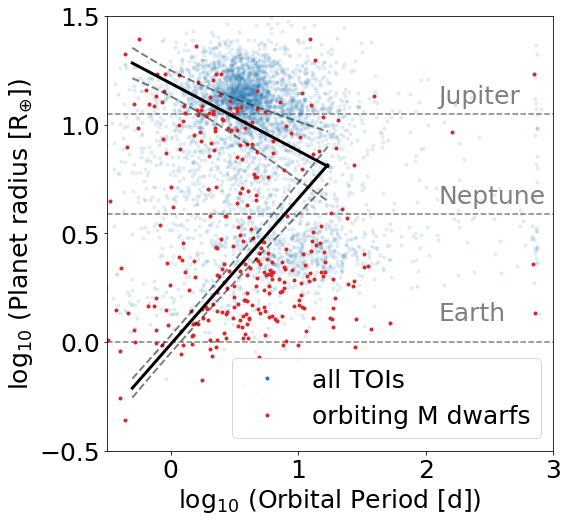

In [14]:
#https://github.com/jpdeleon/toi1696/blob/main/notebooks/neptune_desert.ipynb
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pl
pl.rcParams['font.size'] = 25


fig, ax = pl.subplots(figsize=(8,8))

xmin,xmax=np.log10(0.5), np.log10(17) #day
x=np.linspace(xmin,xmax)

method='likelihood'
y1=[i.n for i in upper_boundary(x,method=method)]
ys1=[i.s for i in upper_boundary(x,method=method)]

y2=[i.n for i in lower_boundary(x,method=method)]
ys2=[i.s for i in lower_boundary(x,method=method)]

xvar, yvar = 'Period (days)', 'Planet Radius (R_Earth)'
idx = df['Stellar Eff Temp (K)']<=3800 #around M dwarfs

ax.plot(np.log10(df.loc[~idx, xvar]), 
        np.log10(df.loc[~idx, yvar]), 
        '.', 
        c='C0',
        label='all TOIs',
        alpha=0.1
       )
ax.plot(np.log10(df.loc[idx, xvar]), 
        np.log10(df.loc[idx, yvar]), 
        '.', 
        c='C3',
        label='orbiting M dwarfs'
       )

leg = pl.legend()
#Disable opacity for legend
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

#density contour
# _ = sb.kdeplot(np.log10(df[xvar]), 
#                np.log10(df[yvar]), 
#                cmap='gray_r', 
#                n_levels=8, 
#                log_scale=False, 
#                fill=True, 
#                ax=ax, 
#                zorder=-1)

#upper boundary
ax.plot(x,y1,'k-',lw=3,zorder=10)
ax.plot(x,np.add(y1,ys1),'k--',lw=2,zorder=10,alpha=0.5)
ax.plot(x,np.subtract(y1,ys1),'k--',lw=2,zorder=10,alpha=0.5)
#lower boundary
ax.plot(x,y2,'k-',lw=3,zorder=10)
ax.plot(x,np.add(y2,ys2),'k--',lw=2,zorder=10,alpha=0.5)
ax.plot(x,np.subtract(y2,ys2),'k--',lw=2,zorder=10,alpha=0.5)

ax.set_xlabel("$\log_{10}$ (Orbital Period [d])")
ax.set_ylabel("$\log_{10}$ (Planet radius [R$_{\oplus}$])")

alpha = 0.5
ax.axhline(np.log10(1), 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
dx = 2.1
ax.text(dx, 0.1, 'Earth', alpha=alpha)
Rnep = np.log10(3.88)
ax.axhline(Rnep, 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
ax.text(dx, Rnep+0.05, 'Neptune', alpha=alpha)
Rjup = np.log10(11.2)
ax.axhline(Rjup, 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
ax.text(dx, Rjup+0.05, 'Jupiter', alpha=alpha)
ax.set_ylim(-0.5,1.5)
ax.set_xlim(-0.5,3)

ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=4)